# Project Title : Sales Prediction : Predicting sales of Rossmann's Drug Store

# Problem Description 
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# Data Description 

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day (this is what you are predicting)
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
Promo - indicates whether a store is running a promo on that day
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df1=pd.read_csv(r"D:\Rossman Store.csv",parse_dates=['Date'])




C:\Users\loukik mzahadik\AppData\Local\Temp\ipykernel_8312\2267712412.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r"D:\Rossman Store.csv",parse_dates=['Date'])


In [3]:
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<AxesSubplot:>

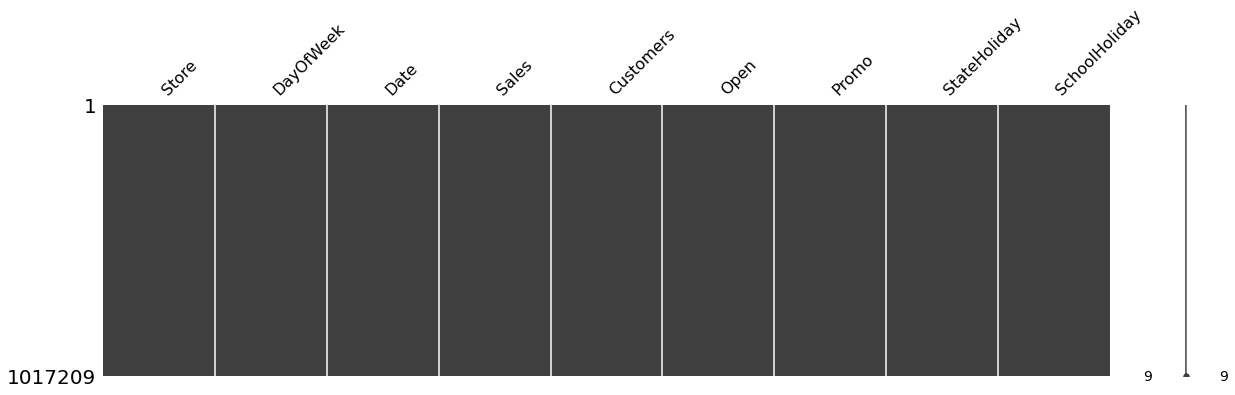

In [4]:
import missingno as m
m.matrix(df1,figsize=(20,5))

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


# Checking Each column

1.Day of week

In [7]:
df1.groupby('DayOfWeek')['Sales'].sum()

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

2.customors

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

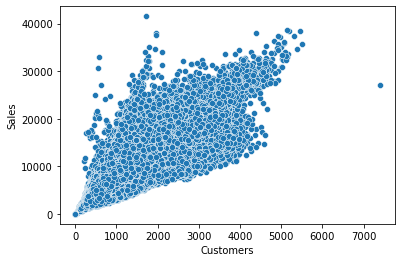

In [8]:
sns.scatterplot(x='Customers',y='Sales',data=df1)

sales and customors are varying linerly. Customrs is important parameter do predict sales

<AxesSubplot:xlabel='Open', ylabel='count'>

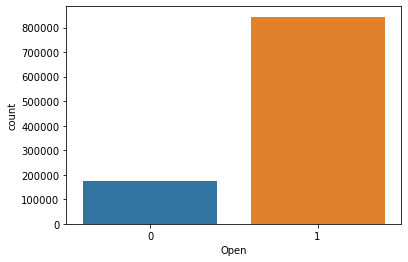

In [9]:
sns.countplot(x='Open',data=df1)

Most of the time store is open so we have to take care at train test spliting

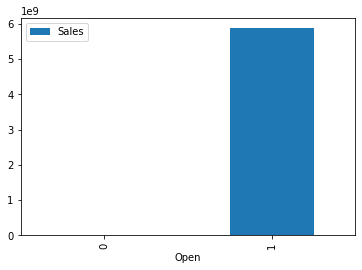

In [10]:
sum=df1.groupby("Open")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

4.Promo

<AxesSubplot:xlabel='Promo', ylabel='count'>

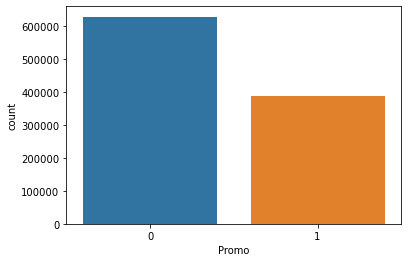

In [11]:
sns.countplot(x='Promo',data=df1)

In [12]:
sum=df1.groupby("Promo")['Sales'].sum().to_frame()
sum

,Sales
Promo,
0,2771974337
1,3101206286


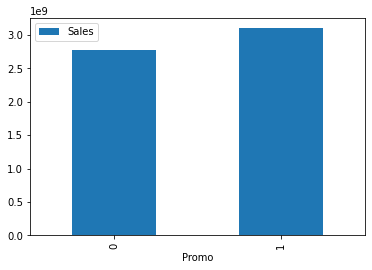

In [13]:
sum.plot(kind='bar')
plt.show()

StateHoliday

In [14]:
df1["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [15]:
df1["StateHoliday"] = df1["StateHoliday"].astype(str).astype(str)

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

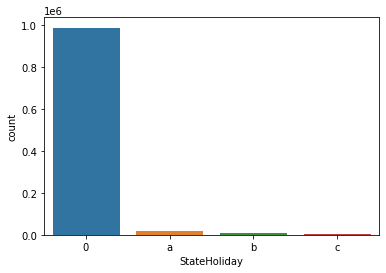

In [16]:
sns.countplot(x='StateHoliday',data=df1)

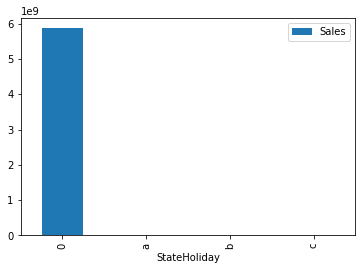

In [17]:
sum=df1.groupby("StateHoliday")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

In [18]:
label=pd.get_dummies(df1['StateHoliday'],drop_first=True)
df1=pd.concat([df1,label],axis=1)
df1=df1.drop(['StateHoliday'],axis=1)

SchoolHoliday

In [19]:
df1['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

<AxesSubplot:xlabel='SchoolHoliday', ylabel='count'>

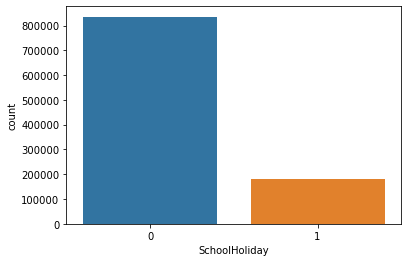

In [20]:
sns.countplot(x='SchoolHoliday',data=df1)

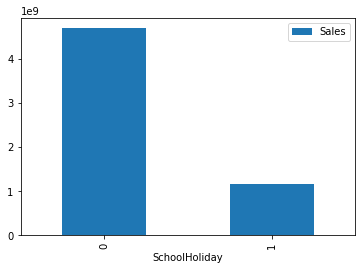

In [21]:
sum=df1.groupby("SchoolHoliday")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

Date

In [22]:
df1=df1.drop(['Date'],axis=1)

In [23]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,a,b,c
0,1,5,5263,555,1,1,1,0,0,0
1,2,5,6064,625,1,1,1,0,0,0
2,3,5,8314,821,1,1,1,0,0,0
3,4,5,13995,1498,1,1,1,0,0,0
4,5,5,4822,559,1,1,1,0,0,0


Heat Map

<AxesSubplot:>

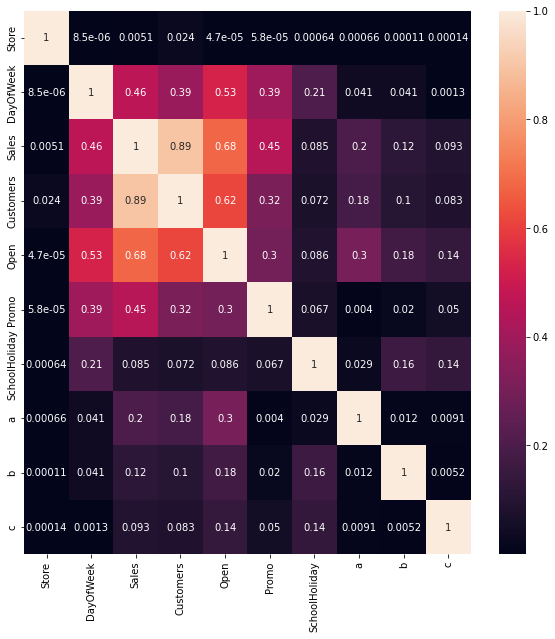

In [24]:
plt.figure(figsize=(10,10))
cor=abs(df1.corr())
sns.heatmap(cor,annot=True)

Obsevations

1)Sales is highly Correlated with customor (0.89 corr).
2)SchoolHoliday month and year have very low correlation with sales.
3)No multicolinearity

# Store Data

In [25]:
df2=pd.read_csv(r"D:\store.csv")

In [26]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


<AxesSubplot:>

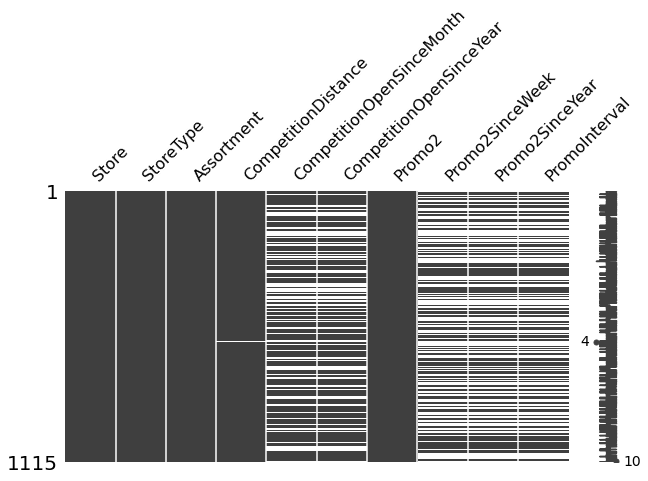

In [28]:
m.matrix(df2,figsize=(10,5))

In [29]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Analysis of each column

1.Store type

<AxesSubplot:xlabel='StoreType', ylabel='count'>

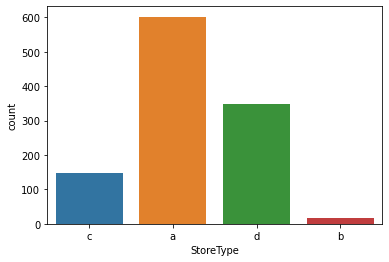

In [31]:
sns.countplot(x='StoreType',data=df2)

There are 4 type of store.maximum stores are in catogory a

2.Assortment

<AxesSubplot:xlabel='Assortment', ylabel='count'>

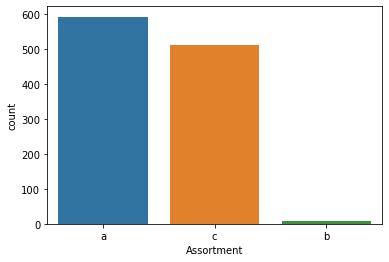

In [32]:
sns.countplot(x='Assortment',data=df2)

Most of the store have basic assortment.There are very low stores who have extended assortment

3.CompetitionDistance

C:\Users\loukik mzahadik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

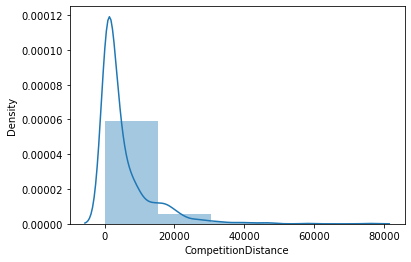

In [33]:
sns.distplot(df2['CompetitionDistance'],kde=True,bins=5)

In [34]:
df2['CompetitionDistance'].mean()

5404.901079136691

In [35]:
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].mean(),inplace=True)

In [36]:
df2['CompetitionDistance'].isnull().sum()

0

4.CompetitionOpenSinceMonth

<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='count'>

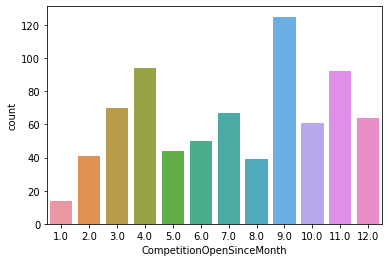

In [37]:
sns.countplot(x='CompetitionOpenSinceMonth',data=df2)

In [38]:
df2['CompetitionOpenSinceMonth'].median()

8.0

In [39]:
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].median(),inplace=True)

In [40]:
df2['CompetitionDistance'].isnull().sum()


0

CompetitionOpenSinceYear

<AxesSubplot:xlabel='CompetitionOpenSinceYear', ylabel='count'>

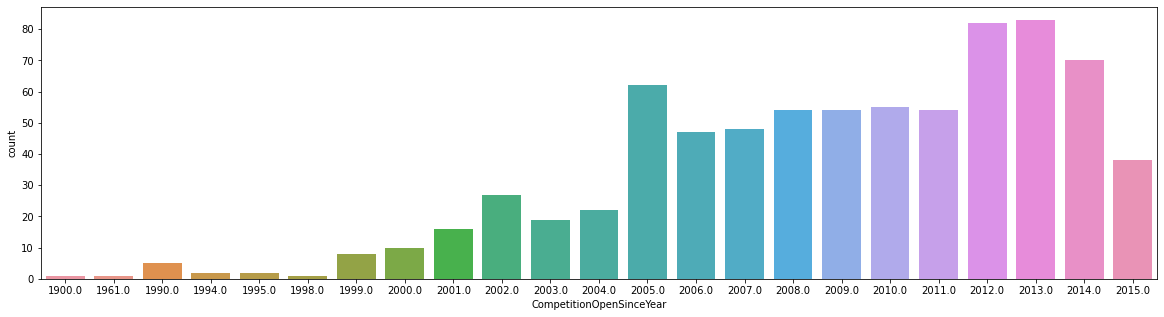

In [41]:
plt.figure(figsize=(20,5))

sns.countplot(x='CompetitionOpenSinceYear',data=df2)

In [42]:
df2['CompetitionOpenSinceYear'].median()

2010.0

In [43]:
df2['CompetitionOpenSinceYear'].fillna(int(df2['CompetitionOpenSinceYear'].median()),inplace=True)

In [44]:
df2['CompetitionOpenSinceYear'].isna().sum()

0

Promo2

<AxesSubplot:xlabel='Promo2', ylabel='count'>

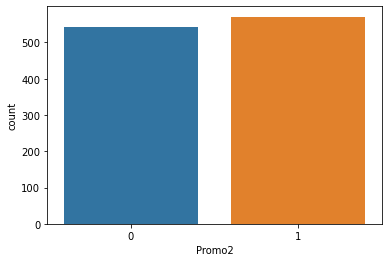

In [45]:
sns.countplot(x='Promo2',data=df2)

Promo2SinceWeek

C:\Users\loukik mzahadik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Promo2SinceWeek', ylabel='Density'>

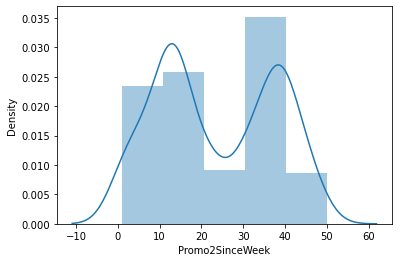

In [46]:
sns.distplot(df2['Promo2SinceWeek'],kde=True,bins=5)

<AxesSubplot:xlabel='StoreType', ylabel='Promo2SinceWeek'>

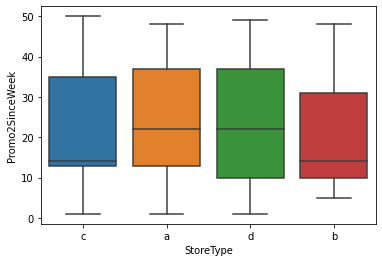

In [47]:
sns.boxplot(x='StoreType',y='Promo2SinceWeek',data=df2)

<AxesSubplot:xlabel='Promo2SinceWeek'>

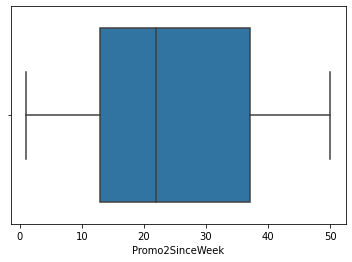

In [48]:
sns.boxplot(x='Promo2SinceWeek',data=df2)

In [49]:
df2['Promo2SinceWeek'].mean()

23.595446584938703

In [50]:
df2['Promo2SinceWeek'].fillna(int(df2['Promo2SinceWeek'].mean()),inplace=True)

In [51]:
 df2['Promo2SinceWeek'].isnull().sum()

0

Promo2SinceYear

<AxesSubplot:xlabel='Promo2SinceYear', ylabel='count'>

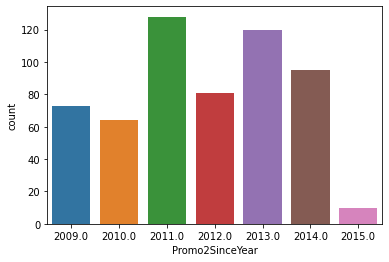

In [52]:
sns.countplot(x='Promo2SinceYear',data=df2)

In [53]:
df2['Promo2SinceYear'].fillna(int(df2['Promo2SinceYear'].mode()),inplace=True)

In [54]:
df2['Promo2SinceYear'].isna().sum()

0

PromoInterval

<AxesSubplot:xlabel='PromoInterval', ylabel='count'>

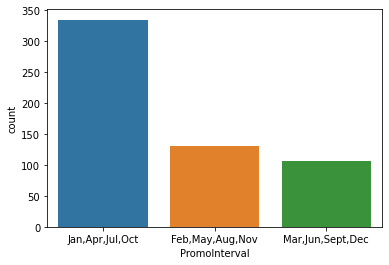

In [55]:
sns.countplot(x='PromoInterval',data=df2)

In [56]:
df2['PromoInterval'].value_counts().index[0]

'Jan,Apr,Jul,Oct'

In [57]:
df2['PromoInterval'].fillna(df2['PromoInterval'].value_counts().index[0],inplace=True)

<AxesSubplot:>

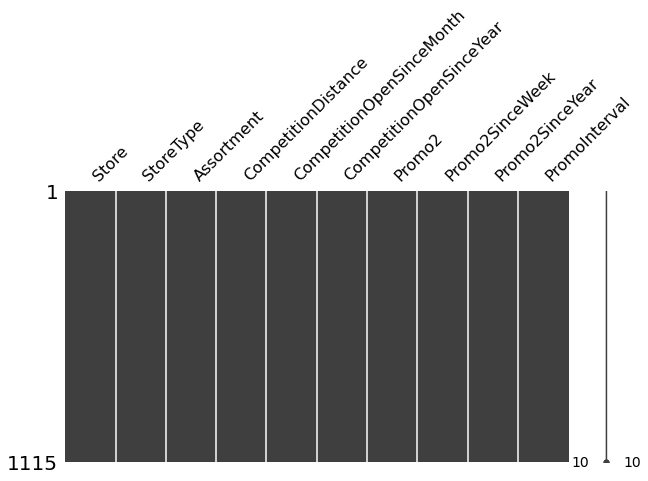

In [58]:
m.matrix(df2,figsize=(10,5))

Dummy variable trap for catogarical feature

In [59]:
cat=['StoreType','Assortment','PromoInterval']
for col in cat:
   a= df2[col]
   print(col)
   label=pd.get_dummies(a,drop_first=True)
   df2=pd.concat([df2,label],axis=1)


StoreType
Assortment
PromoInterval


In [60]:
df2=df2.drop(['StoreType','Assortment','PromoInterval'],axis=1)

In [61]:
df2.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,b,c,d,b,c,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,0,0,0,0,0,1,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,0,0,0,0,0,1,0
3,4,620.0,9.0,2009.0,0,23.0,2011.0,0,1,0,0,1,1,0
4,5,29910.0,4.0,2015.0,0,23.0,2011.0,0,0,0,0,0,1,0


In [62]:
final_df=df1.merge(df2, left_on='Store', right_on='Store')

In [63]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,a,b_x,c_x,...,Promo2,Promo2SinceWeek,Promo2SinceYear,b_y,c_y,d,b_y,c_y,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,5020,546,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,4782,523,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,5011,560,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,6102,612,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0


In [64]:
'StoreType','Assortment','PromoInterval'

('StoreType', 'Assortment', 'PromoInterval')

In [65]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'a', 'b_x', 'c_x', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'b_y', 'c_y', 'd', 'b_y', 'c_y',
       'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'],
      dtype='object')

In [66]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,a,b_x,c_x,...,Promo2,Promo2SinceWeek,Promo2SinceYear,b_y,c_y,d,b_y,c_y,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,5020,546,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,4782,523,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,5011,560,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,6102,612,1,1,1,0,0,0,...,0,23.0,2011.0,0,1,0,0,0,1,0


<AxesSubplot:>

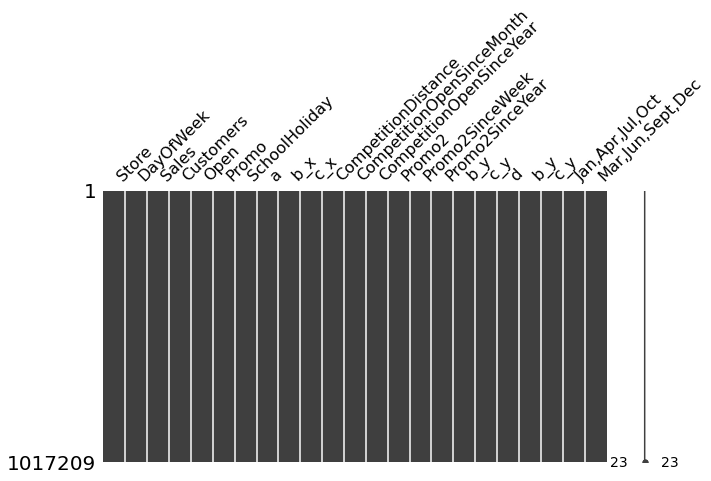

In [67]:
m.matrix(final_df,figsize=(10,5))

In [68]:
x=final_df.drop(['Sales'],axis=1)
y=final_df['Sales']

In [69]:
x

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,a,b_x,c_x,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,b_y,c_y,d,b_y,c_y,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,5,555,1,1,1,0,0,0,1270.0,...,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,546,1,1,1,0,0,0,1270.0,...,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,523,1,1,1,0,0,0,1270.0,...,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,560,1,1,1,0,0,0,1270.0,...,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,612,1,1,1,0,0,0,1270.0,...,0,23.0,2011.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,339,1,0,1,0,0,0,5350.0,...,1,22.0,2012.0,0,0,1,0,1,0,1
1017205,1115,5,326,1,0,1,0,0,0,5350.0,...,1,22.0,2012.0,0,0,1,0,1,0,1
1017206,1115,4,300,1,0,1,0,0,0,5350.0,...,1,22.0,2012.0,0,0,1,0,1,0,1
1017207,1115,3,305,1,0,1,0,0,0,5350.0,...,1,22.0,2012.0,0,0,1,0,1,0,1


# Model Preparation

xgBoost model

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.20)

In [72]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [73]:
from xgboost import XGBRegressor

In [74]:
xgbr=XGBRegressor()
model=xgbr.fit(x_train,y_train)

In [75]:
y_pred=xgbr.predict(x_test)

In [76]:
xgbr.score(x_train,y_train)

0.9798502396781256

In [77]:
xgbr.score(x_test,y_test)

0.9788591019132461

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9788591019132461

Feature Importanse

In [79]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [80]:
import shap

In [81]:
x.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'a', 'b_x', 'c_x', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'b_y', 'c_y', 'd', 'b_y', 'c_y', 'Jan,Apr,Jul,Oct',
       'Mar,Jun,Sept,Dec'],
      dtype='object')

In [82]:
explainer=shap.TreeExplainer(model,x_test)
shap_values=explainer.shap_values(x_test)


100%|===================| 203368/203442 [22:45<00:00]        

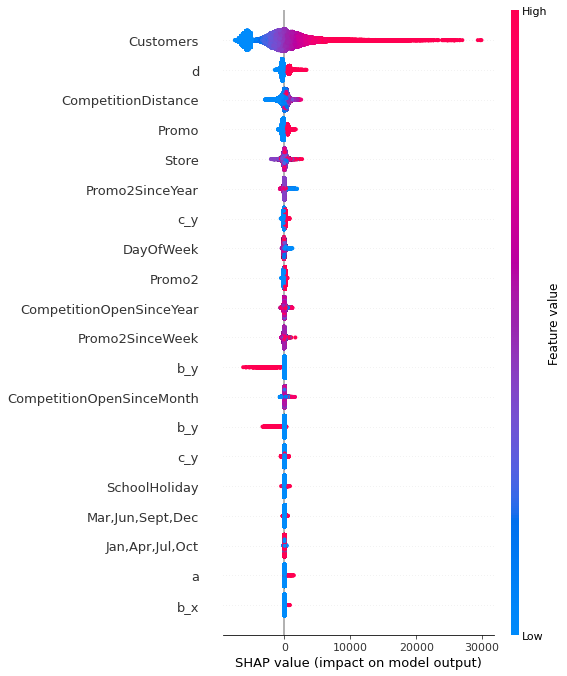

In [83]:
shap.summary_plot(shap_values,x_test,feature_names=x.columns)

Linear regression

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [85]:
y1=regressor.predict(x_test)
a=r2_score(y_test,y1)

In [86]:
a

0.8994362134614594

# XGBooost hyper parameter tunning

In [87]:
param={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,11,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
xgbr=XGBRegressor()

In [90]:
random_search=RandomizedSearchCV(xgbr,param_distributions=param,n_iter=5,n_jobs=-1,cv=5,verbose=5,scoring='neg_mean_squared_error')

In [93]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 11,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=5)

In [98]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [99]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [100]:
xgbr=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=15, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [101]:
model=xgbr.fit(x_train,y_train)

[17:15:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [110]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9788591019132461